# FRAUD DETECTION MODEL USING MACHINE LEARNING TECHNIQUES

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/aishwarya/Downloads/PS_20174392719_1491204439457_log.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# rename few columns

In [7]:
df = df.rename(columns = {'oldbalanceOrg':'oldBalanceOrig' , 'newbalanceOrig' : 'newBalanceOrig' , 'oldbalanceDest' : 'olBaalanceDest','newbalanceDest' : 'newBalanceDest'})

In [8]:
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# Test if there are any missing values

df.isnull().values.any() # No missing values

False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   olBaalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df['isFraud'].isna().sum() # checks the number of missing values

0

In [15]:
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
# categorical variables

In [17]:
df.describe(include = ['object']) # statistics for the categorical variables

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [18]:
#EDA : Exploratory Data Analysis

In [19]:
# Let's understand the data even better.
# Let's calculate the class imbalance

In [19]:
# Class imbalance is the percentage of the total number of transactions in the isFraud column

In [20]:
Total_transactions = len(df)
Total_transactions

6362620

In [21]:
normal = len(df[df.isFraud == 0])
normal

6354407

In [22]:
fraud = len(df[df.isFraud == 1])

In [23]:
# Percentage of fraud transactions

fraud_transactions = round((fraud/Total_transactions*100),2)

In [24]:
fraud_transactions

0.13

In [25]:
print("Total number of Transactions : {}".format(Total_transactions))
print("Normal Transactions : {}".format(normal))
print("Fraudulent Transactions : {}".format(fraud))
print("Percentage of fraudulent transactions : {}".format(fraud_transactions))

Total number of Transactions : 6362620
Normal Transactions : 6354407
Fraudulent Transactions : 8213
Percentage of fraudulent transactions : 0.13


In [26]:
normal_transactions = round((normal/Total_transactions*100),2)
normal_transactions
print("Percentage of normal transactions : {}".format(normal_transactions))

Percentage of normal transactions : 99.87


In [27]:
# Visualize

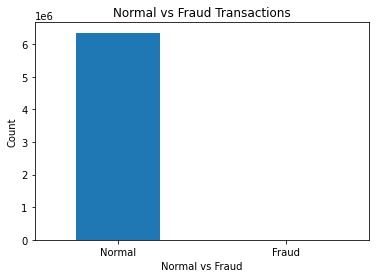

In [28]:
labels = ['Normal' , 'Fraud']
count_classes = df['isFraud'].value_counts(sort = True)
count_classes.plot(kind = 'bar', rot =0)
plt.title('Normal vs Fraud Transactions')
plt.xlabel('Normal vs Fraud')
plt.ylabel('Count')
plt.xticks(range(2),labels)
plt.show()

As we can see from the figure above, there is an enormous difference between the transactions.

Only 0.13% (8,213) transactions in the dataset are fraudulent indicating hight class imbalance in the dataset. This is important becasue if we build a machine learning model on this highlt skewed data, the non-fraudulent transactions will influence the training of the model almost entirely, thus affecting the results.

In [29]:
df.head(10)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Types of Transactions

In [31]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

As we can see there are different types of payment modes available. Now lets visualize the frequency of these payment modes

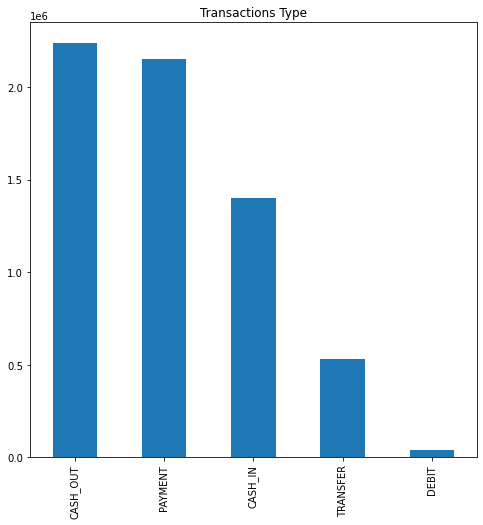

In [32]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
df.type.value_counts().plot(kind = 'bar', title = 'Transactions Type', ax = ax, figsize = (8,8))
plt.show()

The most frequent types of transactions are CASH_OUT and PAYMENT

There are 2 flags which stand out to me and it's interesting to look into: isFraud and isFlaggedFrad column. From the data Dictionary, isFraud is the indicator which indicates the actual fraud transactions whereas 
isFlaggedFraud = 1 indicates that the system is is suspicious that it can be a fraudulent transaction
isFraud = 1 indicates that the transaction is indeed fraudulent

Let's quickly check what kinds of transaction are being flagged and are fraud.
i.e isFlagged = 1 and isFraud = 1

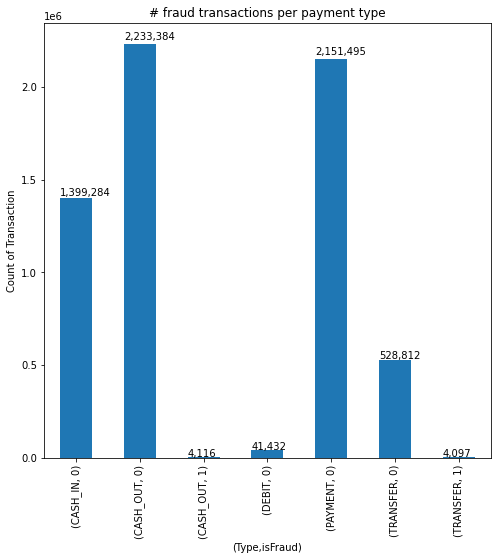

In [33]:
ax = df.groupby(['type','isFraud']).size().plot(kind = 'bar', figsize = (8,8))
ax.set_title('# fraud transactions per payment type')
ax.set_xlabel('(Type,isFraud)')
ax.set_ylabel('Count of Transaction')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))


In [34]:
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [36]:
fraud_df = df[df['isFraud'] == 1]
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8213 non-null   int64  
 1   type            8213 non-null   object 
 2   amount          8213 non-null   float64
 3   nameOrig        8213 non-null   object 
 4   oldBalanceOrig  8213 non-null   float64
 5   newBalanceOrig  8213 non-null   float64
 6   nameDest        8213 non-null   object 
 7   olBaalanceDest  8213 non-null   float64
 8   newBalanceDest  8213 non-null   float64
 9   isFraud         8213 non-null   int64  
 10  isFlaggedFraud  8213 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 770.0+ KB


In [37]:
non_fraud = len(fraud_df[fraud_df.isFraud == 0])
non_fraud


0

In [38]:
fraud = len(fraud_df[fraud_df.isFraud == 1])
fraud

8213

In [39]:
fraud_df.describe(include = 'object')

,type,nameOrig,nameDest
count,8213,8213,8213
unique,2,8213,8169
top,CASH_OUT,C1305486145,C1193568854
freq,4116,1,2


Only CASH-OUT and TRANSFER transactions can be fraudulent. So, it makes sense to retain only these two types of transactions in our dataset.

And from the above figure, the fraudulent transactions are splitted in an equal percentage.

Therefore, there is an almost equal likelihood that a fraudulent transaction can be CASH_OUT or TRANSFER.

Since only CASH-OUT and TRANSFER transactions can be fraudulent, let's reduce the size of the dataset by retaining only these transaction types and removing PAYMENT, CASH-IN and DEBIT.

In [40]:
new_df = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']), :]
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [42]:
print('The new dataframe now has {} transactions'.format(len(new_df)))

The new dataframe now has 2770409 transactions


In [43]:
new_df.describe(include = 'object')


,type,nameOrig,nameDest
count,2770409,2770409,2770409
unique,2,2768630,509565
top,CASH_OUT,C724452879,C1286084959
freq,2237500,3,75


We have now reduced the number of transactions to ~2.8M 

# Data Sanity Checks

In [47]:
#Check that there are no negative amounts
print("Number of transactions where the transaction amount is negative: " + str(sum(new_df['amount'] < 0)))

#Check instances where transacted amount is 0
print("Number of transactions where the transaction amount is 0: " + str(sum(new_df['amount'] == 0)))

Number of transactions where the transaction amount is negative: 0
Number of transactions where the transaction amount is 0: 16


In [48]:
trans_0 = new_df[new_df['amount'] == 0]
trans_0

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


There are only a few cases in which transacted amount is 0. We observe by exploring the data of these transactios that they are all fradulent transactions. So, we can assume that if the transaction amount is 0, the transaction is fraudulent.

Let's remove these transactions from the data and include this condition while making the final predictions.

In [49]:
# remove zero amount values

In [50]:
# Remove 0 amount values
new_df = new_df.loc[new_df['amount'] > 0,:]

In [51]:
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


Originator's balance vs Recipient's Balance

Originators balance = Originator inital balance - Trans Amount   

Recipient's Balance = Recipient's intial balance + Trans Amount

In [52]:
new_df_count = len(new_df)
orig_initial_balance = len(new_df[new_df.oldBalanceOrig == 0])
print('Percentage of transactions where the initial balance of the originator is 0: ' +str(round((orig_initial_balance/new_df_count)*100,2)))

dest_final_balance = len(new_df[new_df.newBalanceDest == 0])
print('Percentage of transactions where the Final balance of the recipient is 0: ' +str(round((dest_final_balance/new_df_count)*100,2)))




Percentage of transactions where the initial balance of the originator is 0: 47.23
Percentage of transactions where the Final balance of the recipient is 0: 0.6


Therefore, in almost half of the transactions, the originator's initial balance was recored as 0. However, in less than 1% of cases, the recipient's final balance was recored as 0.

Ideally, the recipient's final balance should be equal to the reipient's initial balance plus the transaction amount. Similarly, the originator's final balance s hould be equal to originator's initial balance minus the transaction amount.

So, let's check these conditions to see whether the old balance and new balance varialbes are captured accurately for both originator and recipient.

In [54]:
new_df['dest_final_balance'] = new_df['olBaalanceDest'] + new_df['amount']
new_df.head()
new_df['orig_final_balance'] = new_df['oldBalanceOrig'] - new_df['amount']
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89


In [56]:
new_df.rename(columns = {'olBaalanceDest' : 'oldBalanceDest'})

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,21363.00,0.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,234216.94,-213808.94
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,237735.30,-214605.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,317952.89,-300850.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,0.00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6379898.12,0.00
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [57]:
c1 = len(new_df[new_df.newBalanceDest != new_df.dest_final_balance])
print("Transation where destination balance are not accurately captured: "+ str(round(c1/new_df_count*100, 2)))

c2 = len(new_df[new_df.newBalanceOrig != new_df.orig_final_balance])
print("Transactions where originator balances are not accurately captured: " + str(round(c2/new_df_count*100, 2)))

Transation where destination balance are not accurately captured: 42.09
Transactions where originator balances are not accurately captured: 93.72


42.09% of transactions have a discrepancy between the recipient’s actual final balance and the calculated final balance.  

93.72% of transactions have a discrepancy between the originator’s actual final balance and the calculated final balance.

#  Balances

In [59]:
fraud_trans = len(new_df[new_df.isFraud == 1])
c3 = len(new_df[(new_df.oldBalanceOrig == 0) & (new_df.isFraud == 1)])

print('% of fradulent transactions where the initial balance of the originator is 0 : '+ str(round(c3/fraud_trans*100, 2)))


gen_trans = len(new_df[new_df.isFraud == 0])
c4 = len(new_df[(new_df.oldBalanceOrig == 0) & (new_df.isFraud == 0)])

print('% of genuine transactions where the initial balance of the originator is 0 : '+ str(round(c4/gen_trans*100, 2)))


% of fradulent transactions where the initial balance of the originator is 0 : 0.3
% of genuine transactions where the initial balance of the originator is 0 : 47.37


The percentage of fraudulent transactions where the originator’s initial balance is zero is only 0.3%.  

However, for non-fraudulent transactions, this percentage is significantly higher, at around 47.37%.

Let's check the inaccuracy in the balance variable and compare between fraud and nonfraud.

The inaccuracy is defined as the difference between what the balance should be accounting for the transaction amount and what it is recorded as balance.



In [60]:
new_df['origBalance_inacc'] = (new_df['oldBalanceOrig'] - new_df['amount']) - new_df['newBalanceOrig']
new_df['destBalance_inacc'] = (new_df['olBaalanceDest'] + new_df['amount']) - new_df['newBalanceDest']


In [61]:
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0


Observed Patterns
The analysis found distinct patterns that can help separate fraudulent from genuine transactions:

Time Step:

Fraudulent transactions are distributed across all time steps, indicating no specific pattern.
Genuine transactions, however, tend to peak at certain time steps, suggesting a potential temporal pattern in non-fraudulent activity.

Balances:

The initial balance of the originator is far more likely to be zero in genuine transactions than in fraudulent ones.
This disparity can act as a red flag—if the initial balance of an originator is non-zero, it might be worth investigating further.
Balance Inaccuracies:

For genuine transactions, the inaccuracy in the recipient’s balance tends to be negative.
In fraudulent transactions, however, the inaccuracy is often positive.
These characteristics suggest that fraudulent transactions may follow unique patterns in both temporal distribution and balance accuracy.

# PREDICTIVE MODELING

In the previous sections, we identified dimensions that make fraudulent transactions detectable. Based on these results, let's build a supervised classification models.

## Modeling Dataset Creation
Let's choose the variables needed for the ML model, encode categorical varialbes as numberic and standardize the data.

The name of the originator and destination are not needed for classification. So, let's remove them.

In [63]:
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0


In [65]:
new_df.drop(['nameDest','nameOrig','isFlaggedFraud','dest_final_balance','orig_final_balance'], axis = 1)

,step,type,amount,oldBalanceOrig,newBalanceOrig,olBaalanceDest,newBalanceDest,isFraud,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,-213808.94,1.827035e+05
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,-214605.30,2.377353e+05
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,-300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05


In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770393 entries, 2 to 6362619
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   step                int64  
 1   type                object 
 2   amount              float64
 3   nameOrig            object 
 4   oldBalanceOrig      float64
 5   newBalanceOrig      float64
 6   nameDest            object 
 7   olBaalanceDest      float64
 8   newBalanceDest      float64
 9   isFraud             int64  
 10  isFlaggedFraud      int64  
 11  dest_final_balance  float64
 12  orig_final_balance  float64
 13  origBalance_inacc   float64
 14  destBalance_inacc   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 338.2+ MB


Let's check the correlation between variables

/var/folders/r7/6sm8cfpd1dj0pvnnvbppr5tw0000gn/T/ipykernel_60383/2588963839.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize = 13, rotation = 45)
/var/folders/r7/6sm8cfpd1dj0pvnnvbppr5tw0000gn/T/ipykernel_60383/2588963839.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels, fontsize = 13)


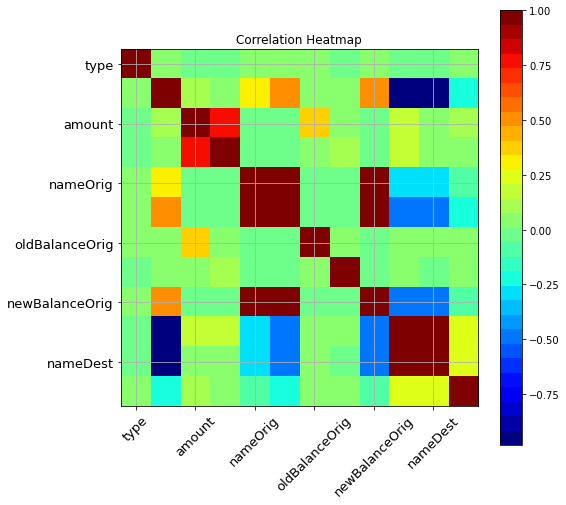

In [74]:
import matplotlib.cm as cm

def correlation_plot(df):
    fig = plt.figure(figsize = (8,8)) 
    ax1 = fig.add_subplot(111) # creates a subplot of 1*1 at subplot position 1
    cmap = cm.get_cmap('jet',30)
    cax = ax1.imshow(df.corr(), interpolation = "nearest", cmap = cmap ) # created heatmap b/w variables.
    ax1.grid(True) # shows gridlines
    plt.title("Correlation Heatmap")
    labels = df.columns.tolist()
    ax1.set_xticklabels(labels, fontsize = 13, rotation = 45)
    ax1.set_yticklabels(labels, fontsize = 13)
    fig.colorbar(cax)
    plt.show()
    
correlation_plot(new_df)
    

In [75]:
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0


Text(10, 100000, 'Skewnes: 0.08')

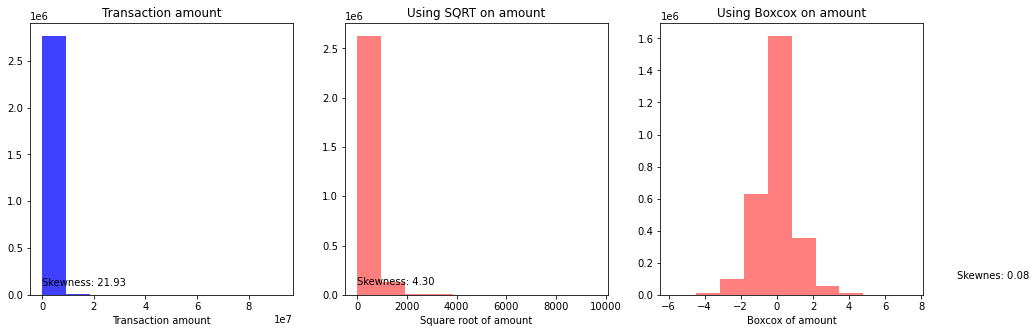

In [79]:
#Based on the dataset, the numeric variables are quite skew, in this case. I'll try to scale it with 2 methods and compare them on the graph.

from scipy.stats import skew, boxcox
from sklearn import preprocessing

new_df['amount_boxcox'] = preprocessing.scale(boxcox(new_df['amount']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_df['amount'], facecolor='blue', alpha=0.75)
plt.xlabel("Transaction amount")
plt.title("Transaction amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(new_df['amount'])))

figure.add_subplot(132)
plt.hist(np.sqrt(new_df['amount']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of amount")
plt.title("Using SQRT on amount")
plt.text(10,100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['amount']))))

figure.add_subplot(133)
plt.hist(new_df['amount_boxcox'], facecolor = "red", alpha=0.5)
plt.xlabel("Boxcox of amount")
plt.title("Using Boxcox on amount")
plt.text(10, 100000, "Skewnes: {0:.2f}".format(skew(new_df['amount_boxcox'])))


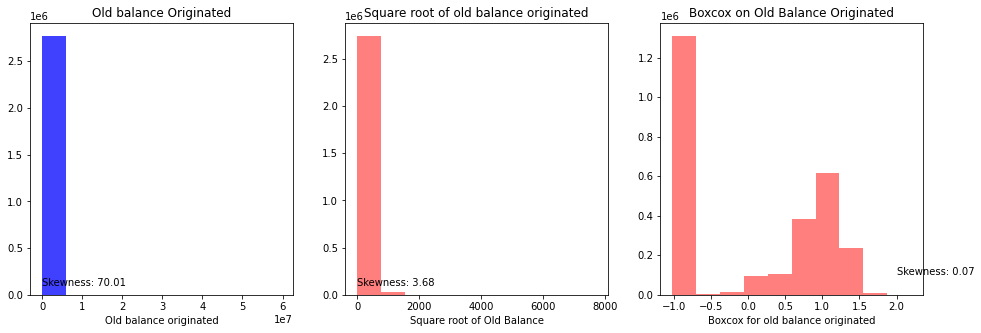

In [80]:
new_df['oldBalanceOrig_boxcox'] = preprocessing.scale(boxcox(new_df['oldBalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_df['oldBalanceOrig'], facecolor='blue', alpha=0.75)
plt.xlabel('Old balance originated')
plt.title("Old balance Originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df["oldBalanceOrig"])))

figure.add_subplot(132)
plt.hist(np.sqrt(new_df['oldBalanceOrig']), facecolor="red", alpha=0.5)
plt.xlabel("Square root of Old Balance")
plt.title("Square root of old balance originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['oldBalanceOrig']))))

figure.add_subplot(133)
plt.hist(new_df['oldBalanceOrig_boxcox'], facecolor = "red", alpha=0.5)
plt.xlabel("Boxcox for old balance originated")
plt.title("Boxcox on Old Balance Originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['oldBalanceOrig_boxcox'])))

plt.show()


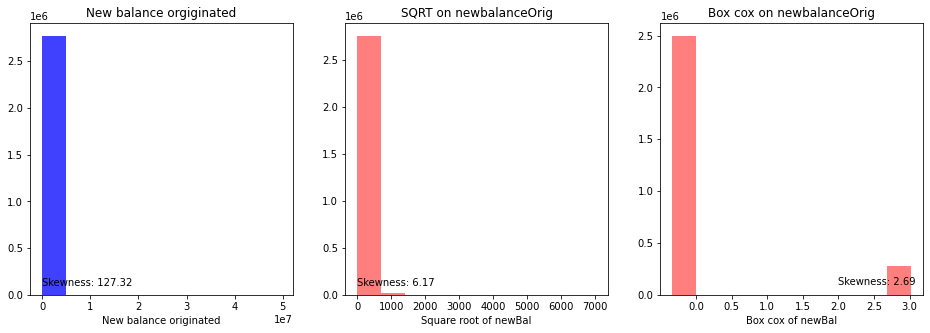

In [81]:
new_df['newbalanceOrg_boxcox'] = preprocessing.scale(boxcox(new_df['newBalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(new_df['newBalanceOrig'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("New balance originated") 
plt.title("New balance orgiginated") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_df['newBalanceOrig'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_df['newBalanceOrig']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['newBalanceOrig']))))

figure.add_subplot(133)
plt.hist(new_df['newbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['newbalanceOrg_boxcox'])))

plt.show()

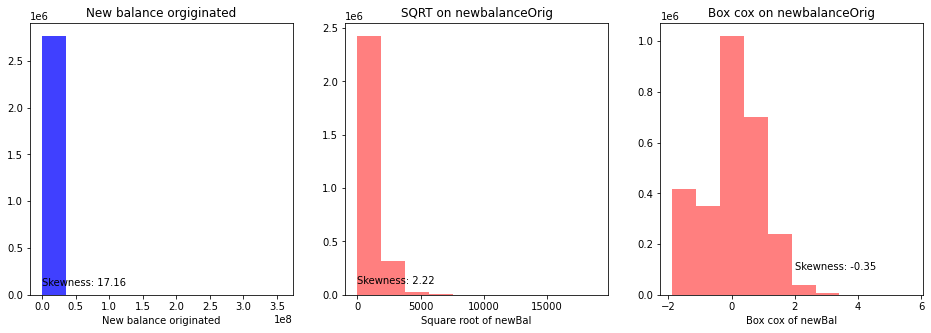

In [89]:
new_df['oldBalanceDest_boxcox'] = preprocessing.scale(boxcox(new_df['olBaalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(new_df['olBaalanceDest'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("New balance originated") 
plt.title("New balance orgiginated") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_df['olBaalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_df['olBaalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['olBaalanceDest']))))

figure.add_subplot(133)
plt.hist(new_df['oldBalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['oldBalanceDest_boxcox'])))

plt.show()

In [90]:
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,olBaalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc,amount_boxcox,oldBalanceOrig_boxcox,newbalanceOrg_boxcox,oldBalanceDest_boxcox
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0,-4.099565,0.039552,-0.331129,-1.873358
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0,-4.099565,0.039552,-0.331129,-0.917302
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5,0.288017,0.856866,-0.331129,-1.191655
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3,0.234390,0.297408,-0.331129,-0.904636
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0,0.558227,0.795600,-0.331129,-1.156123


Let's calculate the fraud transactions of the filtered dataset


In [92]:
print('The percentage of the fraud transactions of the filtered dataset is {}'.format((len(new_df[new_df.isFraud == 1])/len(new_df))*100))

The percentage of the fraud transactions of the filtered dataset is 0.29587859917347464


Even after filtering the dataset by removing the unwanted transaction type th efraud percentage is 0.3%. This is an imbalance dataset

Using under-sampling, where the size of the majority class (non-fraudulent transactions) by randomly selecting a subset. This subset will match the number of samples in the minority class (fraudulent transactions), creating a 50-50 class balance.

In [96]:
new_df.drop(["oldBalanceOrig", "newBalanceOrig", "olBaalanceDest", "newBalanceDest", "amount", "type", "origBalance_inacc", "destBalance_inacc", "step"], axis=1, inplace=True)
new_df.head()

,nameOrig,nameDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,amount_boxcox,oldBalanceOrig_boxcox,newbalanceOrg_boxcox,oldBalanceDest_boxcox
2,C1305486145,C553264065,1,0,181.00,0.00,-4.099565,0.039552,-0.331129,-1.873358
3,C840083671,C38997010,1,0,21363.00,0.00,-4.099565,0.039552,-0.331129,-0.917302
15,C905080434,C476402209,0,0,234216.94,-213808.94,0.288017,0.856866,-0.331129,-1.191655
19,C1670993182,C1100439041,0,0,237735.30,-214605.30,0.234390,0.297408,-0.331129,-0.904636
24,C1984094095,C932583850,0,0,317952.89,-300850.89,0.558227,0.795600,-0.331129,-1.156123


In [97]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770393 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   nameOrig               object 
 1   nameDest               object 
 2   isFraud                int64  
 3   isFlaggedFraud         int64  
 4   dest_final_balance     float64
 5   orig_final_balance     float64
 6   amount_boxcox          float64
 7   oldBalanceOrig_boxcox  float64
 8   newbalanceOrg_boxcox   float64
 9   oldBalanceDest_boxcox  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 232.5+ MB


## Addressing Class Imbalance
There are many techniques to address hight-class imbalanced datasets. A few examples are follows -

Undersampling: In this method, random samples from the majority class are deleted so that the class imbalance is more managable.  

Oversampling: In this method, observations of the minority class are resampled with repetition to increase their presence in the data.  

SMOTE: This is a type of oversampling, but instead of repeating the observations, it synthesizes new plausible observations of the minority class.  

I use undersampling as it is less compulation-intensive. I train the logistic Regression model on a subset of the original training dataset. We retain all the fraud cases and randomly select an equal number of non-fraud cases to create an unsersampled training dataset.

 Minority Class : Fraudulent Transactions  
 
 Majority Class : Non-Fradulent Transactions  
 
 # Number of records in the minority class

In [114]:
X = new_df.iloc[:, new_df.columns != 'isFraud']
y = new_df.iloc[:, new_df.columns == 'isFraud']

In [120]:
#Number of data points in the minoroity class
number_records_fraud = len(new_df[new_df.isFraud == 1])
fraud_indices = new_df[new_df.isFraud == 1].index.values

# Picking the indices of the normal classes
normal_indices = new_df[new_df.isFraud == 0].index

# Out of the indices we picked, randomly select "x" number (x - same as total fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = new_df.loc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'isFraud']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'isFraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.isFraud == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.isFraud == 1])/len(under_sample_data))
print("Total number of transactions in resample data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resample data:  16394


# Logistic Regression classifier - Manual Under-Sampling data
From the model evaluation (or confusion matrix), we know that.

Accuracy = ( TP + TN ) / Total
Presion = TP / ( TP + FP )
Recall = TP / (TP + FN )
As such, specifically for this problem, we are interested in the recall score to captue the most fraudulent transactions. As we know, due to the imbalance of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

Obviously, trying to increase recall, trends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turs out not to be, is not a massive problem compared to the opposite.

Due to this, many evaluation will be based on recall score.

In [121]:
from sklearn.model_selection import train_test_split

## Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

print("Number of transactions in train dataset: ", format(len(X_train), ",d"))
print("Number of transactions in test dataset: ", format(len(X_test), ",d"))
print("Total number of transactions: ", format(len(X_train)+len(X_test),",d"))

# Undersampled Dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

print("Number transactions train dataset: ", format(len(X_train_undersample),',d'))
print("Number transactions test dataset: ", format(len(X_test_undersample),',d'))
print("Total number of transactions: ", format(len(X_train_undersample)+len(X_test_undersample),',d'))

Number of transactions in train dataset:  1,939,275
Number of transactions in test dataset:  831,118
Total number of transactions:  2,770,393
Number transactions train dataset:  11,475
Number transactions test dataset:  4,919
Total number of transactions:  16,394


## Let's train a Logistic Regression model using undersampled test and train data which we created above.

In [135]:
X.dtypes  # For the original dataset
X_undersample.dtypes  # For the undersampled dataset


isFlaggedFraud             int64
dest_final_balance       float64
orig_final_balance       float64
amount_boxcox            float64
oldBalanceOrig_boxcox    float64
newbalanceOrg_boxcox     float64
oldBalanceDest_boxcox    float64
dtype: object

In [136]:
X = X.select_dtypes(include=[np.number])  # Keeps only numeric columns
X_undersample = X_undersample.select_dtypes(include=[np.number])


In [137]:
X = pd.get_dummies(X)
X_undersample = pd.get_dummies(X_undersample)


keeps some non-numeric columns (like categorical data), you can encode them. LabelEncoder works well if the categorical values are few and have an inherent order.

In [140]:
from sklearn.preprocessing import LabelEncoder

# Example: Apply encoding to any non-numeric columns in X
X_train_undersample = X_train_undersample.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
X_test_undersample = X_test_undersample.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)


In [139]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_undersample = label_encoder.fit_transform(y_train_undersample.ravel())
y_test_undersample = label_encoder.fit_transform(y_test_undersample.ravel())

logreg = LogisticRegression()
logreg.fit(X_train_undersample, y_train_undersample)

LogisticRegression()

In [141]:
y_pred = logreg.predict(X_test_undersample)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_undersample, y_test_undersample)))

Accuracy of logistic regression classifier on test set: 0.91


In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_undersample, y_pred)
print(confusion_matrix)

[[2068  426]
 [  11 2414]]


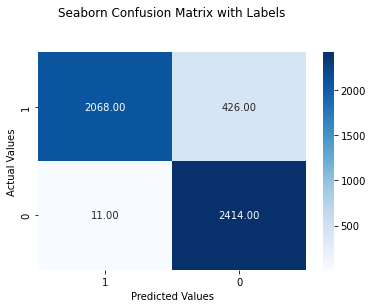

In [143]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix,fmt=".2f", annot=True, cmap="Blues")

ax.set_title('Seaborn Confusion Matrix with Labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])

plt.show()

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test_undersample, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2494
           1       0.85      1.00      0.92      2425

    accuracy                           0.91      4919
   macro avg       0.92      0.91      0.91      4919
weighted avg       0.92      0.91      0.91      4919



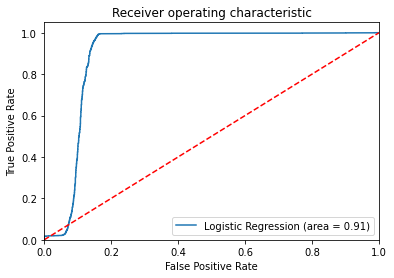

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test_undersample, logreg.predict(X_test_undersample))
fpr, tpr, thresholds = roc_curve(y_test_undersample, logreg.predict_proba(X_test_undersample)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Analysis Summary

I analyzed the financial transactions data and developed a machine learning model to detect fraud. The analysis included data cleaning, exploratory analysis and predictive modeling.

In the data cleaning, I checked for missing values, columns names and summarized the variables in the data.